In [1]:
import pandas as pd
import numpy as np
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import re

In [2]:
# Определим датафрейм
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
sleep_df['sleep60'] = sleep_df['sleep']/60 # создадим столбец часов времени
# Отфильтруем датафрейм по гендерному признаку
sleep_male = sleep_df[sleep_df['male']==1] # Датафрейм для мужчин
sleep_female = sleep_df[sleep_df['male']==0] # Датафрейм дла женщин

In [5]:
sleep_male

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,sleep60
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,51.883333
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,48.666667
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,44.500000
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,57.466667
5,41,0,6,0.000000,0.000000,12,0,1,1,4812,...,1205,0,0,1205,23,0,23,19.249998,1681,67.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,50,0,693,0.182331,0.030075,12,2500,1,0,4417,...,2603,0,2603,0,32,0,22,NaN,2500,51.000000
694,44,0,695,0.182331,0.030075,16,16250,1,0,4539,...,2513,0,2513,0,22,0,19,NaN,1936,50.466667
695,29,0,696,0.182331,0.030075,16,16250,1,0,4639,...,2418,0,2418,0,7,1,5,NaN,841,50.383333
699,61,0,700,0.182331,0.030075,17,27500,1,0,4362,...,2725,0,2725,0,38,0,30,NaN,3721,49.883333


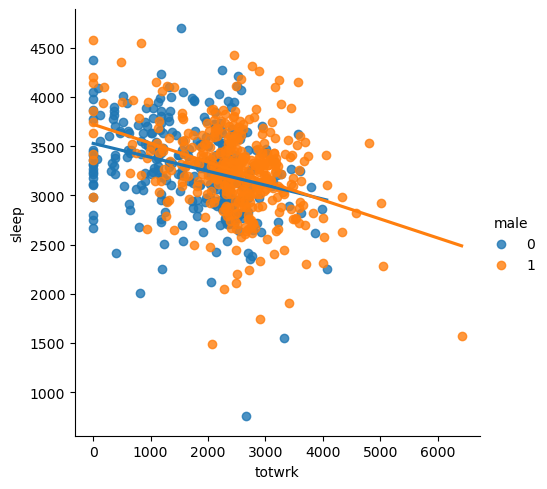

In [4]:
sns.lmplot(data = sleep_df, x = 'totwrk', y = 'sleep', ci = None, hue = 'male')

In [6]:
slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_ml = smf.ols(data= sleep_male, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_fml = smf.ols(data= sleep_female, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()

In [10]:
print(f'RSS:{slp.ssr.round(2)}, RSS_1:{slp_ml.ssr.round(2)},RSS_2:{slp_fml.ssr.round(2)} ')

RSS:33859.8, RSS_1:17618.98,RSS_2:15717.91 


In [11]:
F_obs =( slp.ssr - (slp_ml.ssr + slp_fml.ssr) )/((slp_ml.ssr + slp_fml.ssr)) * (len( sleep_female ) + len( sleep_male ) - 14) / 7
F_obs

1.550614737699912

In [12]:
alpha = 0.01
stats.f.ppf(1-alpha,7,len( sleep_female ) + len( sleep_male ) - 14  )

2.6651528022423494

Вывод: 
    $$F_{obs}<F_{cr}$$, данные согласуются с нулевой гипотезой. Структурные изменения не значимы.